In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Donlyone7\OneDrive\Desktop\Bharat Intern\House Price Prediction\housing.csv')

In [3]:
df.head()  # printing the first 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### After observing the data I can see that "median_house_value" column is our target column and every other column is going to be tha input features

In [4]:
df.info() # Checking the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum() # Checking for null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.dropna(inplace = True) # Dropping null values

In [7]:
df.isnull().sum() # no null values!

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Splitting the data into trainig data and testing data

In [8]:
# importing depenndencies
from sklearn.model_selection import train_test_split

In [9]:
x = df.drop(['median_house_value'], axis = 1) # storing the features into x df
y = df['median_house_value'] # storing the target into y df

In [10]:
x.sample(5) # sample of features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13946,-117.22,34.26,16.0,8020.0,1432.0,1749.0,540.0,4.9716,INLAND
16536,-121.24,37.79,7.0,5151.0,867.0,2553.0,805.0,4.0750,INLAND
7306,-118.20,33.99,35.0,1608.0,465.0,2140.0,488.0,3.1979,<1H OCEAN
10782,-117.91,33.64,29.0,1652.0,310.0,832.0,326.0,4.8098,<1H OCEAN
8327,-118.30,33.94,36.0,2041.0,531.0,1390.0,464.0,2.0114,<1H OCEAN


In [11]:
y.sample(5) # sample of target

14961    249400.0
3252      60900.0
19228    190300.0
20124    191700.0
448      220700.0
Name: median_house_value, dtype: float64

In [12]:
# splitting data into train ad test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [13]:
print(x.shape, x_train.shape, x_test.shape) # prinitg the shape of the x ad train and test data

(20433, 9) (16346, 9) (4087, 9)


In [14]:
train_data = x_train.join(y_train) # joining train data
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,INLAND,137500.0
17449,-120.46,34.74,15.0,2185.0,386.0,827.0,336.0,5.3765,NEAR OCEAN,223100.0
5360,-118.41,34.04,52.0,1907.0,261.0,681.0,249.0,10.9805,<1H OCEAN,500001.0
2451,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,INLAND,67000.0
15791,-122.42,37.77,52.0,759.0,323.0,421.0,255.0,2.0548,NEAR BAY,162500.0
...,...,...,...,...,...,...,...,...,...,...
6470,-118.06,34.10,38.0,1960.0,330.0,874.0,308.0,4.8594,<1H OCEAN,265900.0
15437,-117.22,33.20,31.0,1736.0,277.0,801.0,292.0,4.4844,<1H OCEAN,205500.0
11629,-118.08,33.81,21.0,1189.0,281.0,577.0,264.0,3.3155,<1H OCEAN,237500.0
1699,-122.28,37.96,35.0,1579.0,243.0,734.0,264.0,5.5000,NEAR BAY,201000.0


## Data Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

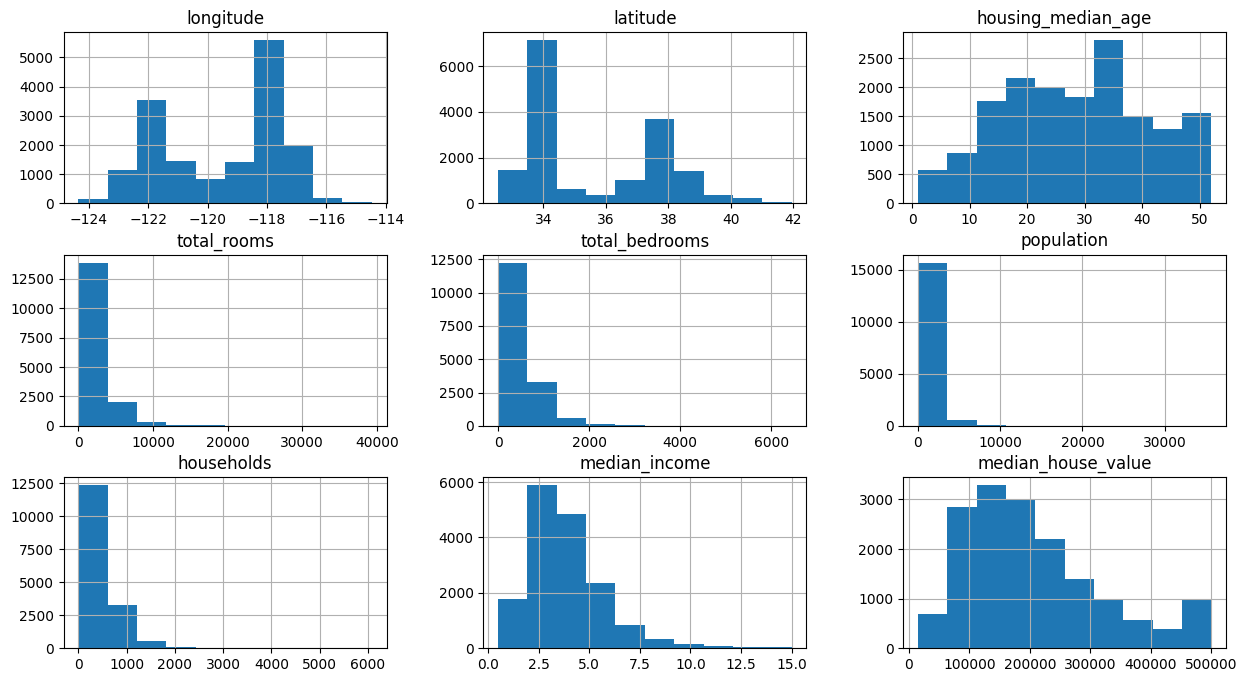

In [15]:
train_data.hist(figsize = (15, 8))  # histogram of train_data

C:\Users\Donlyone7\AppData\Local\Temp\ipykernel_14404\2533842460.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu') # ignore the warning


<Axes: >

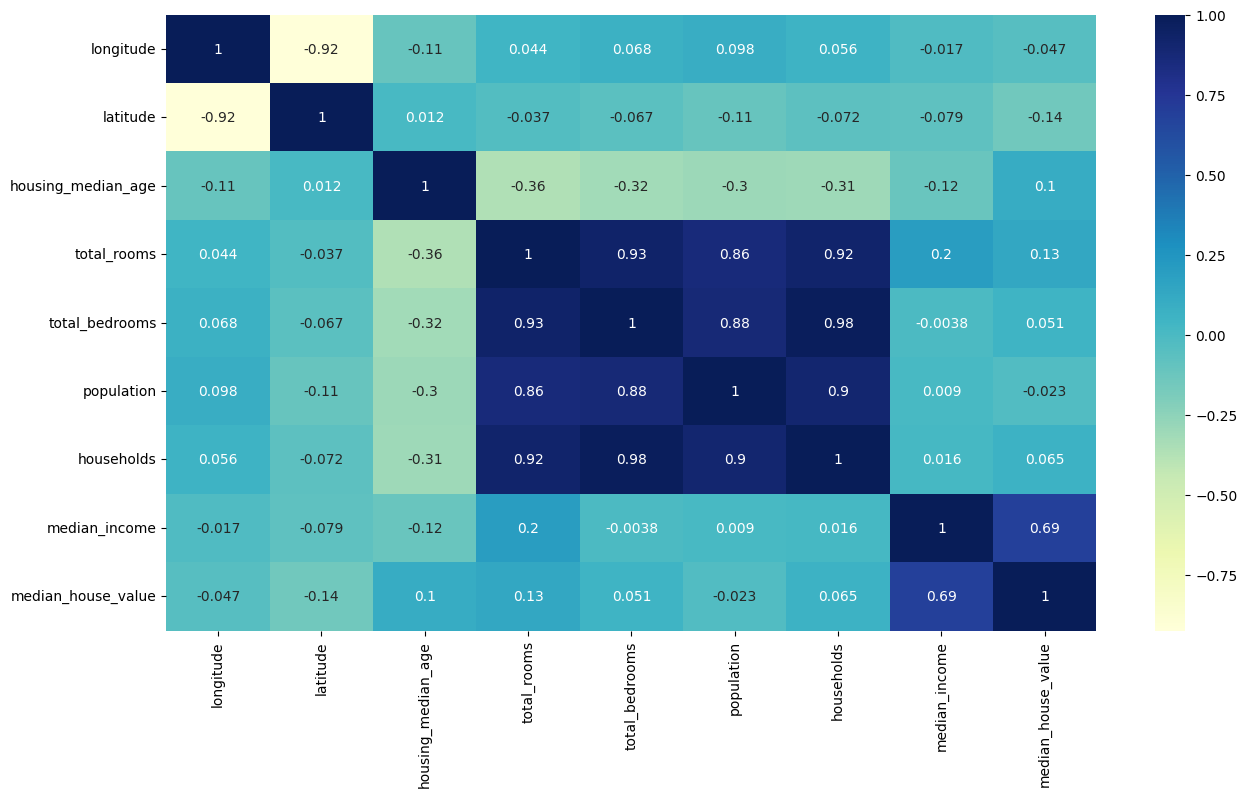

In [16]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu') # ignore the warning

##### The median income has very high correlation with the median house value

## Data Preprocessing

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

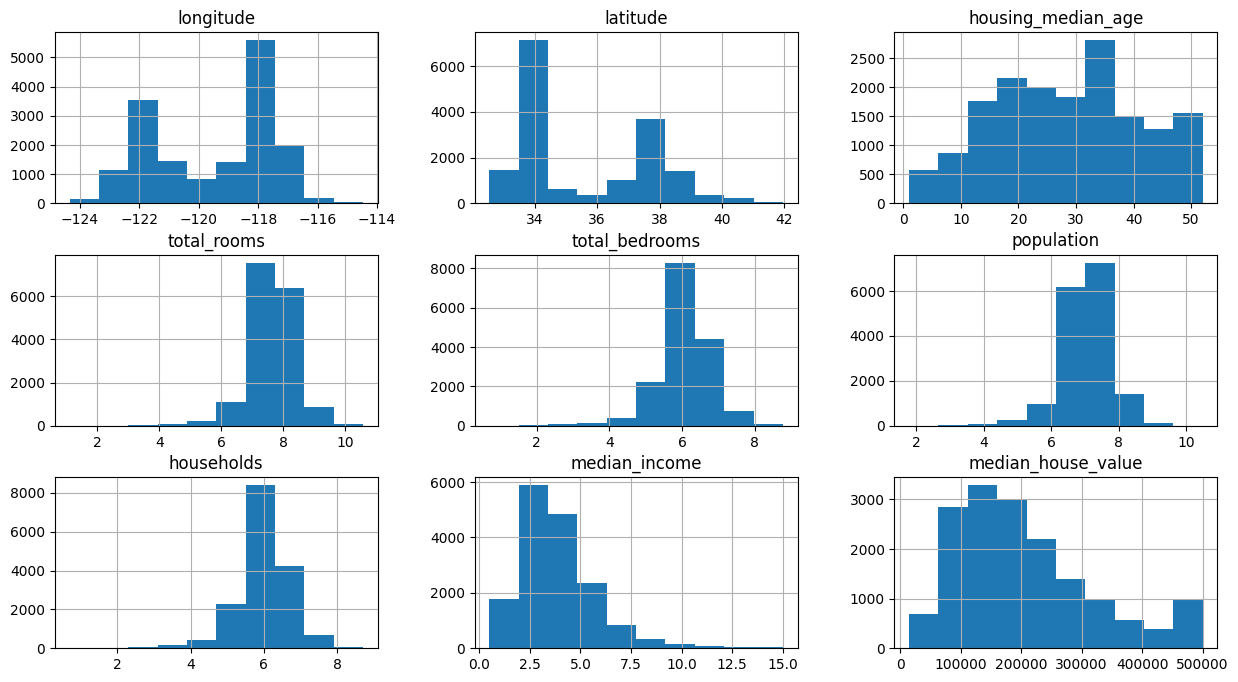

In [18]:
train_data.hist(figsize = (15, 8))

##### The previous histogram shows that the data was scewed and now we can see the data is a nice Gaussian Bell Curve (NNormal Distribution)

### I want to use the 'ocean_proximity' column too because I think a house being closer to an ocean will affect the price but I need to do some feature engineering in that column to fit it into the model

In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7231
INLAND        5177
NEAR OCEAN    2128
NEAR BAY      1806
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
pd.get_dummies(train_data.ocean_proximity) # this is one hot encoding in pandas

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3126,0,1,0,0,0
17449,0,0,0,0,1
5360,1,0,0,0,0
2451,0,1,0,0,0
15791,0,0,0,1,0
...,...,...,...,...,...
6470,1,0,0,0,0
15437,1,0,0,0,0
11629,1,0,0,0,0
1699,0,0,0,1,0


In [21]:
# joining with train_data and dropping the previous column
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: xlabel='latitude', ylabel='longitude'>

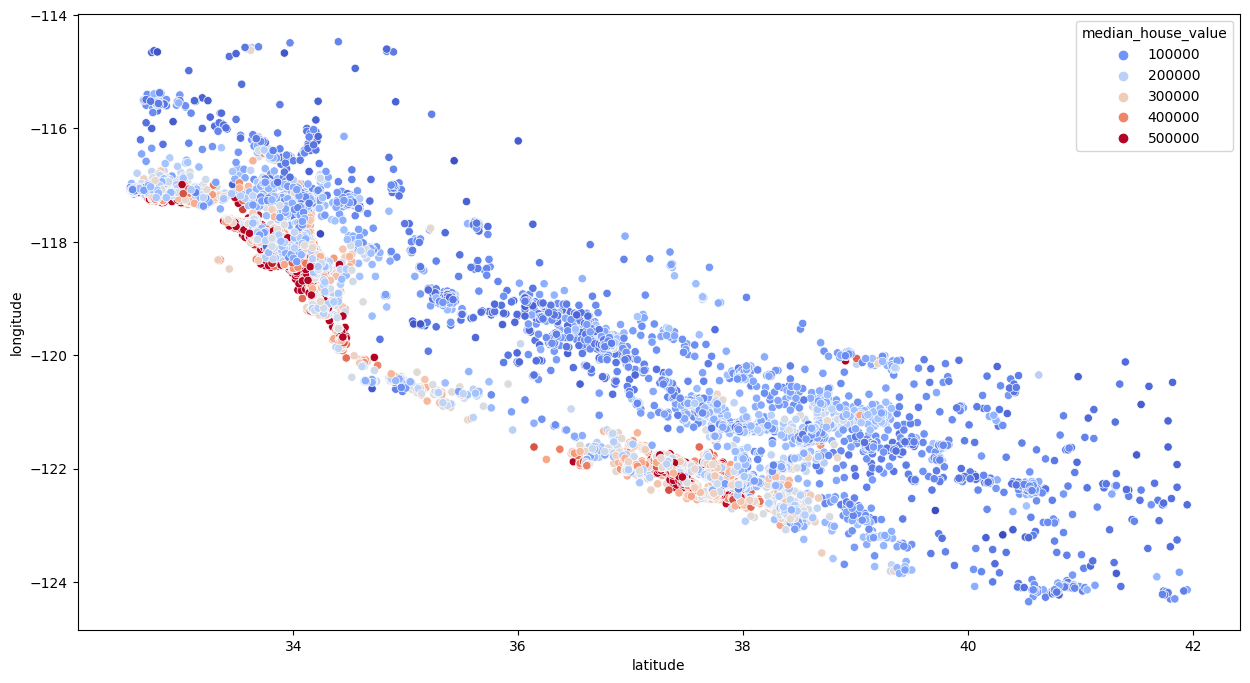

In [22]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

## Feature Engineering

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

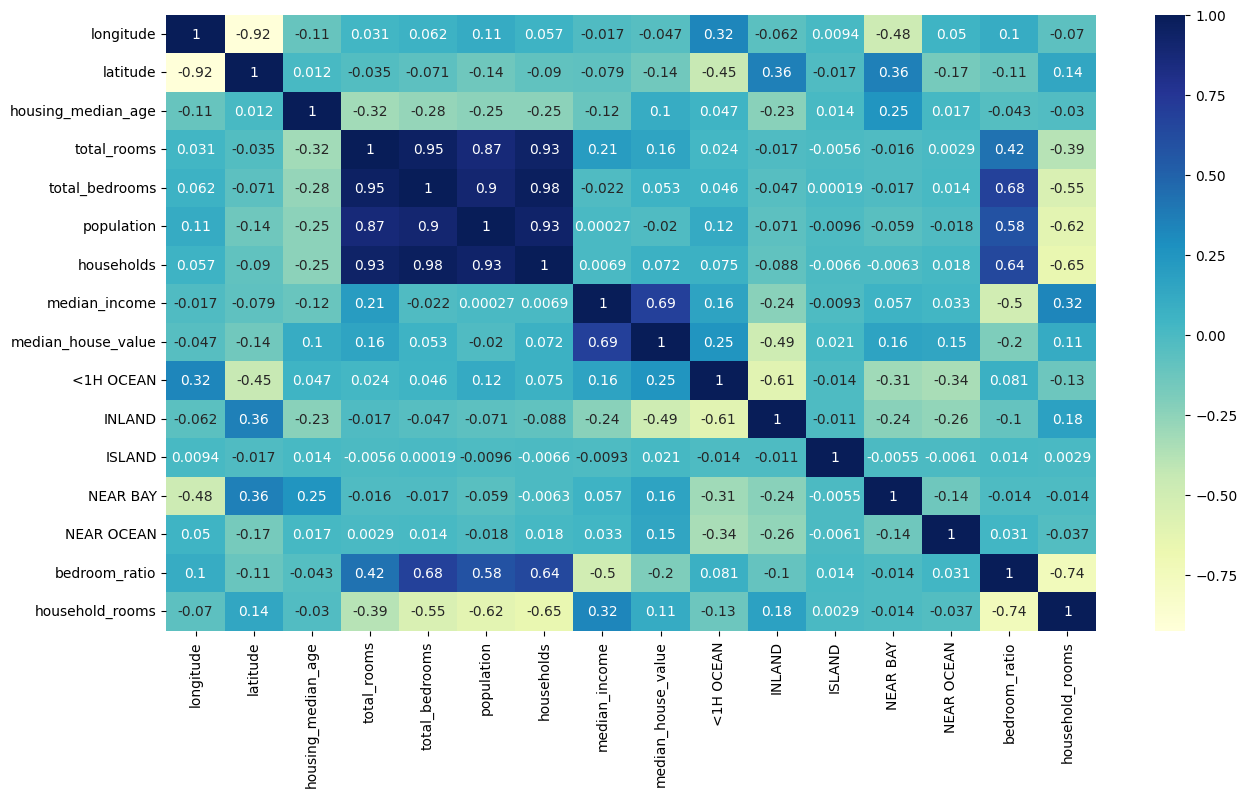

In [24]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu') # ignore the warning

## Modeling

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [26]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


# doing the same for test data

In [27]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [28]:
x_test_s = scaler.transform(x_test)

In [29]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9432,-122.81,38.08,19.0,7.387709,5.905362,6.704414,5.823046,3.4609,238800.0,0,0,0,0,1,0.799350,1.268702
6443,-118.03,34.10,32.0,7.889459,6.413459,7.321850,6.295266,2.9422,233100.0,0,1,0,0,0,0.812915,1.253237
3060,-119.14,35.76,30.0,6.601230,4.927254,6.045005,4.736198,2.5625,156300.0,0,1,0,0,0,0.746414,1.393782
16230,-121.33,37.97,36.0,7.577634,6.200509,6.907755,5.918894,2.0043,90800.0,0,1,0,0,0,0.818265,1.280245
16489,-121.18,38.07,21.0,7.755339,5.934894,6.979145,5.808142,4.8125,161100.0,0,1,0,0,0,0.765266,1.335253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,-122.25,37.49,40.0,7.904704,6.257668,7.053586,6.236370,4.6366,395500.0,0,0,0,0,1,0.791638,1.267517
4915,-118.27,34.00,48.0,7.533694,6.135565,7.514800,6.091310,1.7052,107400.0,1,0,0,0,0,0.814417,1.236794
1046,-120.72,38.38,9.0,7.488853,5.852202,6.693324,5.726848,2.5250,157200.0,0,1,0,0,0,0.781455,1.307675
5993,-117.72,34.09,36.0,7.295735,5.796058,6.666957,5.703782,3.2566,151800.0,0,1,0,0,0,0.794445,1.279105


In [30]:
reg.score(x_test, y_test)

0.6897615562355102

In [31]:
from sklearn.ensemble import RandomForestRegressor

forrest = RandomForestRegressor()

forrest.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
forrest.score(x_test, y_test)

0.8323566325111588

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [8, 12, 20],
    'min_samples_split': [2, 4, 6, 8]
}

grid_search = GridSearchCV(forrest, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
best_forrest = grid_search.best_estimator_

In [39]:
best_forrest.score(x_test, y_test)

0.8321698866275161